<a href="https://colab.research.google.com/github/chayvw18/Master-Statistics-ML/blob/main/Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/MasterStats

/content/drive/MyDrive/MasterStats


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.patches import Polygon

**Confidence Intervals on Parameters**
<br>

Confidence Interval: The probability that an unknown population parameter falls within a range of values in repeated samples *how confident can you be that the population parameter lies within your confidence interval*
<br>

CI are typically quantified by estimating the distribution or computing it numerically and taking 95% of the distribution.
<br>

CI repersents our confidence in future experiments/ independent replications of the experiment and how likely the pop parameter will fall within CI in those future experiments

<br>

***P(LowerBound <mu/population prob < UpperBound) = confidence***
<br>
Typical Confidence Intervals Probabilities - 95%, 99%, 90%

**Factors that influence confidence intervals**
<br>

* Confidence Intervals are influenced by the *sample size* and *variance* when smample size is larger, confidence intervalsare closer together, and when the variance is smaller confidence intervals are closer together

****We need a way to compute confidence intervals based on one sample dataset**
<br>

CI = xbar +-(U/L bound) t*(k)(t-value with kDegrees of Freedom) *s(sample std) /sqrt(n(sample size))

**t*:t-value associated with one tail of the confidence intervals**

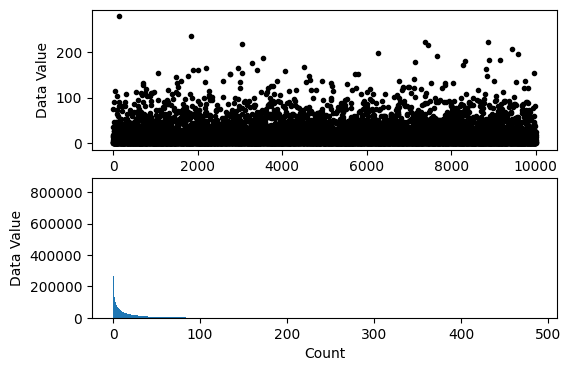

In [9]:
##Stimulate Data

popN = int(1e7)

#the data(note: non-normal)
population = (4*np.random.randn(popN))**2

#we can calculate the exact population mean/
#not feasible to achieve in real life
popMean = np.mean(population)

#Plot it
fig,ax = plt.subplots(2,1, figsize=(6,4))

#only plot every 1000th sample
ax[0].plot(population[::1000], 'k.')
ax[0].set_xlabel('Data Index')
ax[0].set_ylabel('Data Value')

ax[1].hist(population, bins='fd')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Data Value')

plt.show()

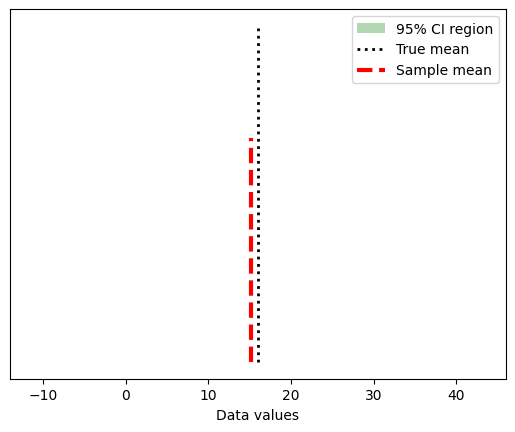

In [22]:
##draw a random sample

#parameter
samplesize = 40
confidence = 95

#compute the sample mean
randSample = np.random.randint(0,popN,samplesize)
sampledata = population[randSample]
samplemean = np.mean(population[randSample])
samplestd = np.std(population[randSample], ddof=1)

#compute the confidence intervals
citmp = (1-confidence)/2
confint = samplemean + stats.t.ppf([citmp, 1-citmp], samplesize-1) * samplestd/np.sqrt(samplesize)

# graph everything
fig,ax = plt.subplots(1,1)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popMean,popMean],[0, 1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0, 1],'r--',linewidth=3)
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('%g%% CI region'%confidence,'True mean','Sample mean'))
plt.show()

***Confidence Intervals via bootstrapping***
<br>

Instead of using a formula to compute confidence intervals, compute them directly based on the data.
<br>

This is done by repeatedly randomly resampling from your dataset.
<br>

*pretend that the sample is the population, and the resampling is the sample*
<br>
*resampling with replacement*

**Bootstrapping:pros and cons**
<br>
***Advantages***
* Works for any kind of parameter (mean,variance,correlation,median,etc)
* Useful for limited data(e.g no experiment reptitions)
* Not based on assumption of normality
<br>

***Limitations***
* Gives (slightly) different results each time
* Can be time consuming for large datasets
* Sample must be a good repersentation of the population


In [23]:
popN = int(1e7)

#the data(note: non-normal)
population = (4*np.random.randn(popN))**2

#we can calculate the exact population mean/
#not feasible to achieve in real life
popMean = np.mean(population)

#Plot it
# fig,ax = plt.subplots(2,1, figsize=(6,4))

# #only plot every 1000th sample
# ax[0].plot(population[::1000], 'k.')
# ax[0].set_xlabel('Data Index')
# ax[0].set_ylabel('Data Value')

# ax[1].hist(population, bins='fd')
# ax[1].set_xlabel('Count')
# ax[1].set_ylabel('Data Value')

plt.show()
#parameter
samplesize = 40
confidence = 95

#compute the sample mean
randSample = np.random.randint(0,popN,samplesize)
sampledata = population[randSample]
samplemean = np.mean(population[randSample])
samplestd = np.std(population[randSample], ddof=1)

##bootstrapping
numboots = 1000
bootmeans = np.zeros(numboots)

#resample with replacement

for booti in range(numboots):
  bootmeans[booti] = np.mean(np.random.choice(sampledata, samplesize))

#find the Confidence Interval
confit = [0,0] #intialize
confit[0] = np.percentile(bootmeans, (100-confidence)/2)
confit[1] = np.percentile(bootmeans,100-(100-confidence)/2)

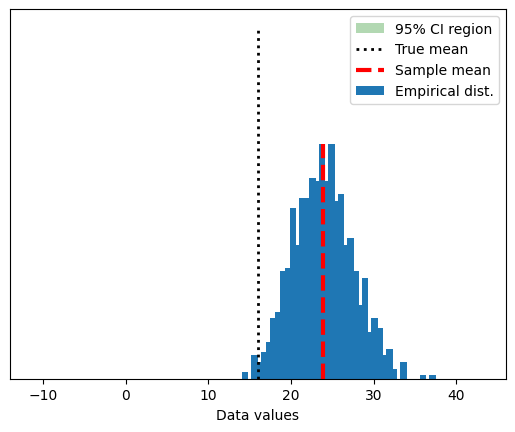

In [24]:
## graph everything
fig,ax = plt.subplots(1,1)

# start with histogram of resampled means
y,x = np.histogram(bootmeans,40)
y = y/max(y)
x = (x[:-1]+x[1:])/2
ax.bar(x,y)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popMean,popMean],[0, 1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0, 1],'r--',linewidth=3)
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('%g%% CI region'%confidence,'True mean','Sample mean','Empirical dist.'))
plt.show()

In [25]:
#compute the confidence intervals
citmp = (1-confidence/100)/2
confint2 = samplemean + stats.t.ppf([citmp, 1-citmp], samplesize-1) * samplestd/np.sqrt(samplesize)

print(confit[0], confit[1])
print(confint2[0], confint2[1])

17.15153337388474 31.081954407283344
16.604434501756764 31.04560177776002
